In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from numpy import nan

In [23]:
jordan = pd.read_csv('data/clean_data/population-jordan.csv', thousands=',')

#source = http://www.worldometers.info/world-population/jordan-population/

In [24]:
refugees_jordan = pd.read_csv('data/clean_data/syr-reg_ref_by_date-jordan.csv', thousands=',')

#source = https://data2.unhcr.org/en/situations/syria/location/36

refugees_jordan['first of year'][1] = refugees_jordan['individuals'][1]

C:\Users\corbi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [25]:
refugees_jordan = refugees_jordan.dropna()

In [26]:
jordan = jordan.dropna()


In [27]:
refugees_jordan = refugees_jordan.reset_index()

In [28]:
refugees_jordan['Date'] = 0

In [29]:
for i in range(len(refugees_jordan)):

    refugees_jordan['Date'][i] = float(refugees_jordan['data_date'][i][-4:])

C:\Users\corbi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
refugees_jordan = refugees_jordan.rename(columns={'Date': 'Year'})

In [31]:
jordan = jordan.reset_index()

In [32]:
type(jordan['Year'][0])

numpy.float64

In [33]:
jordan = jordan.merge(refugees_jordan, on='Year')

In [34]:
jordan

,index_x,Year,Population,Yearly %,Yearly,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban,Urban Population,Country's Share of,World Population,Jordan,index_y,data_date,individuals,first of year
0,2,2018.0,9903802.0,2.08%,"201,449",0.0,22.4,3.53,112.0,67.80%,6710702.0,0.13%,7.632819e+09,91,462,1/2/2018,655624,655624.0
1,3,2017.0,9702353.0,2.61%,"246,551",0.0,22.4,3.53,109.0,68.50%,6648077.0,0.13%,7.550262e+09,92,442,1/5/2017,655399,655399.0
2,4,2016.0,9455802.0,3.24%,"296,500",0.0,22.4,3.53,107.0,69.40%,6561598.0,0.13%,7.466964e+09,93,422,1/19/2016,635324,635324.0
3,5,2015.0,9159302.0,4.98%,"395,382",195057.0,22.1,3.60,103.0,70.30%,6434690.0,0.12%,7.383009e+09,93,367,1/4/2015,623338,623338.0


Text(0, 0.5, 'Refugees as a percent of total Population')

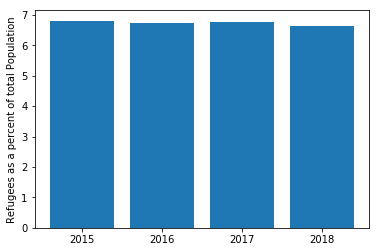

In [35]:
#plt.bar(turkey['Year'], turkey['Population']/1000000)


plt.bar(round(jordan['Year']), (jordan['individuals']/100)/(jordan['Population']/10000))
plt.xticks([2015, 2016, 2017, 2018])

plt.ylabel('Refugees as a percent of total Population')

#This is probably the best chart to show a crisis. The bottom chart is a bit underwhelming.

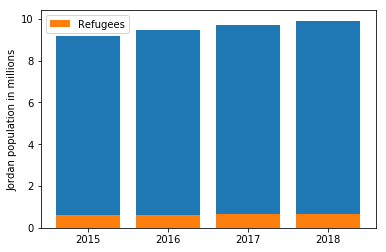

In [36]:
plt.bar(jordan['Year'], jordan['Population']/1000000)
plt.xticks([2015, 2016, 2017, 2018])
plt.bar(jordan['Year'], jordan['individuals']/1000000, label="Refugees")
plt.ylabel('Jordan population in millions')
plt.legend()